## Joseph Rochelle
## 530 Python ThinkStats


In [59]:
# importing libraries and the NSFG data frame 
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import thinkstats2
import nsfg
import numpy as np
import first


In [24]:
#Reading the files from NSFG
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [25]:
# After we go through importing the data we are now focused on the columns 
# To get the columns we execute the following code:

preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [27]:
## There are many ways to grab columns. Here are some examples: 
preg.columns[1]

#Remember 0 would be caseid and 1 is the next entry

'pregordr'

In [28]:
#Type tells us what the data is in the set. 
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

In [29]:
# now we will go through printing an entire column. 
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

In [31]:
# THere are 13K items and to grab an individual you can do the following: 
pregordr[4]

3

In [32]:
# Now if we want to slice the data we can doing the following:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

In [33]:
# To select a column using the dot notation the following can be done: 
pregordr = preg.pregordr

In [35]:
#Within this data, we have the variable for preg outcome that have 6 labels here. The 1 indicated a success and the others have different meaning
#What is important to note is that the sort method tells us 9148 for label 1 as an example. 

preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [37]:
#The next variable we are going to use is the birth weight.  We use the value counts and sort method
#weight starts from 0 to 15lbs
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

In [40]:
#This next section is to take one case and indices 

caseid = 13572
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([], dtype=int64)

In [41]:
#Using this example from the ThinkStats book that had the actual array

caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

In [42]:
# This next section is to get the birthhood details  and to sort them. 

preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

In [43]:
# We begin the data cleaning and looking to see how many are null using the following: 
preg.birthord.isnull().sum()

4445

In [44]:
# We are now looking to see what is in the prglngth columns 
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

In [45]:
# It is clearn in the prglngth we have many varying results. To obtain the mean we do the following:
preg.totalwgt_lb.mean()

7.265628457623368

In [46]:
#This section of the is to create a new column as we convert the LBS to Kilograms. 
#The key part here is that we use the preg[''] to insert into our data frame as a recode
preg['totalwgt_kg'] = preg.totalwgt_lb / 2.2
preg.totalwgt_kg.mean()

3.302558389828807

In [47]:
#The author added a read me from the solutions that i'll use in practice from the zip drive
resp = nsfg.ReadFemResp()

In [48]:
#Here is the running head after we utilize the rsfg zip file. 
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [49]:
# As a reminder we are using resp object from the nsfg file that we imported. 
#This section will take the age of our respondents and index them 

resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

In [54]:
# In this example we call the resp object that was imported and then we call a specific case. In this instance 2298
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


In [56]:
# the case id 2298 has additonal rows as we select them 

preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.500000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.903409
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000


In [52]:
# THis section is simply taking our resp object and case id '1' and returns the age of 44

resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

In [57]:
#As we look at pregenancy lengths, respondand 2298 is used as an example to show 4 lengths of 40, 36, 30, and 40

preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

In [58]:
#As we look at birth weight for case id 5012, we use the following code:
#Note that we are simply calling the case id within the preg data frame that is the column of birth weight denoted with the dot notaiton

preg[preg.caseid==5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

## This section goes more into histograms and descriptive statistics 

In [60]:
#Based off the book, this seciton will beging showing how to utilize histograms and descriptive statistic to guide the reader on how 'first babies' arrive
# We will beging with a frequncy of numbers:
t = [1, 2, 2, 3, 5]

In [61]:
#The first item is a Python dictonary.
#You'll notice the number 2 occurs two times while the others are only once in the output
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

In [62]:
#The counter method was discussed as just another way to arrive at the same information. It is easier
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

In [63]:
#IT is important to note that Allen Downey provides an import called ThinkStats2
#Within this he has modules for the activities we are about to demonstrate
#It is also important to note that varies other libraries and modules can be used
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [64]:
#The frequncy of the module can look up anything. We know 2 occures twice so using this example
hist.Freq(2)

2

In [65]:
#Same thing with the bracket notation:
hist[2]

2

In [66]:
#The examples show that if there is a number entered that does not occur we return the value of '0'. We will use 9 that is not part of the earlier frequncy
hist[9]

0

In [67]:
##I do like the key values method
hist.Values()

dict_keys([1, 2, 3, 5])

In [68]:
#Here is how we can iterate through keys:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


In [69]:
#Same thing through the items method
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


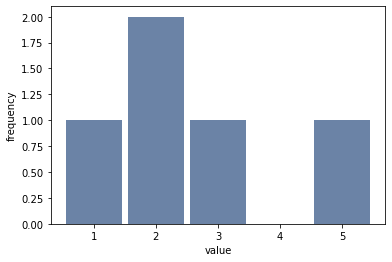

In [75]:
#Once again we are following Allen Downey's "Think Stats" book and he provides a wrapper for matplotlib
#We are doing a histograpm of just the t object earlier 

import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

In [76]:
#Next, we replicate just some frequncies in the book as an example
#Notice that the pregency outcome is from those of 1 birth
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

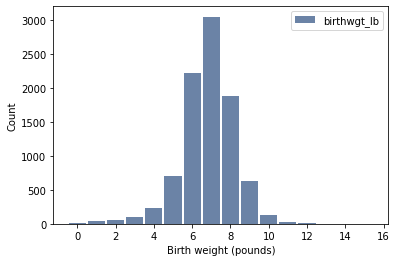

In [77]:
#This is our first histogram with changing labels 

hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

In [78]:
#The author asks to round the birth weight given that some can be 5.5 as an example. 
#This method rounds
ages = np.floor(live.agepreg)

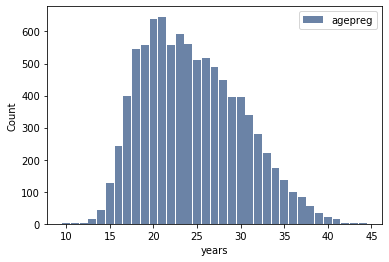

In [79]:
#We now plot the age of pregnancy 
#Here we can see that most pregnancies are from 20s to mid 30s

hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

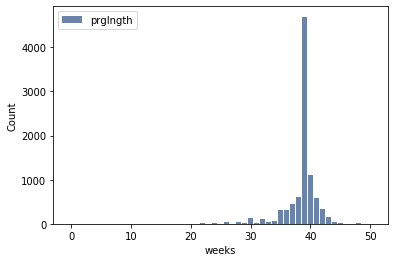

In [80]:
# To determine the lenght of pregnancies, we map that weeks:
#Majority of births are in the 35 to 45 weeks

hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='Count')

In [81]:
#This histogram funciton is driven by the smallest '10' weeks that are in our data. Noticed smallets and 10
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [82]:
#To find the largest 10, we simply switch the method to largets '10'. Most births are at 40 weeks. 

for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


In [84]:
#The next task is to seperate first babies. We are using 'birthord' label to do this for those that had multiple births

#To do so, we utilize the following code:

firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

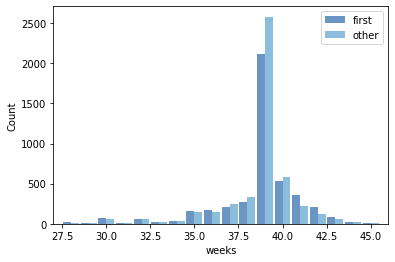

In [85]:
#This section is to add additional items to the histograms. Width is provided to adjust items and we have x limits to keep within our 27 and 46 ranges

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

This section focuses on descriptive statistics

In [86]:
#We beging creating variables of mean, var, std for 'preglngth'
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

In [87]:
#Once the objects are created you can call the object in a seperate line:
mean, std

(38.56055968517709, 2.702343810070593)

In [88]:
#This solution simply creates a boolean because the square root of var is std. 
np.sqrt(var) == std

True

In [89]:
#Our exercise is to determine if first babies have longer lengths than others and this code does that for us:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [95]:
#Notice how the meansre rather close? We can determine how much longer first babies are by subtracting the following:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

In [96]:
#I watned to round the difference to be able to simplfy and did so this way:
difference = firsts.prglngth.mean() - others.prglngth.mean()
round(difference,2)

0.08

In [97]:
#This section focuses on the Cohen effect size of our sampling. 
#The code provided from 'Allen Downey' from 'Think Stats' is the following:

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.    
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [98]:
#After the funciton was created we simply compare the two group diffrences
#To interpret the effect size d =0.2 is considered small, d = 0.5 is medium, and d= 0.8 is large


#The effect size of differnce is first babies is true but small

CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

In [99]:
# We now wash, rinse, repeat finding out information we want about babies. This code executes the weight: 
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [100]:
#Using the funciton already created, we determine if the weight difference is a lot. 
#The answer is that first babies weigh less but the effect size is negative meaning not statistically relevant. 
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

This section is to utilize the code book and resp file from Allen Downey's 'ThinkStats'
Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [102]:
# The resp file is loaded to complet the following reviews:
resp = nsfg.ReadFemResp()

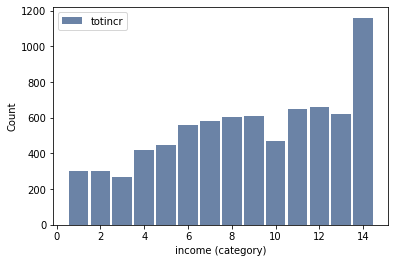

In [103]:
#Make a histogram of totincr the total income for the respondent's family. To interpret the codes see the codebook.
#Please note these are income categories. Click the code book to see that 14 stand for $75K or more. 

hist = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(hist, label='totincr')
thinkplot.Config(xlabel='income (category)', ylabel='Count')

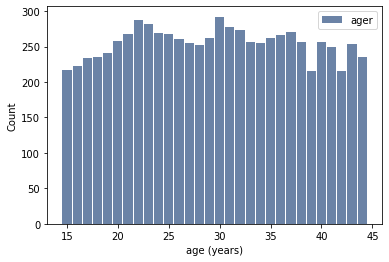

In [104]:
#The following is age at the time of the interveiw.  The following code using 'ager' can be used:


hist = thinkstats2.Hist(resp.ager)
thinkplot.Hist(hist, label='ager')
thinkplot.Config(xlabel='age (years)', ylabel='Count')

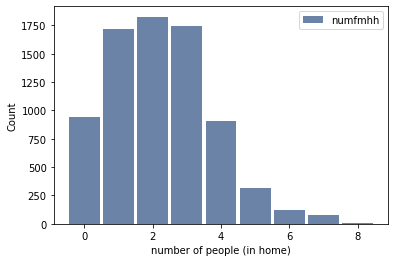

In [106]:
#When we want to know number of household individauls we can do the following:

hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Config(xlabel='number of people (in home)', ylabel='Count')

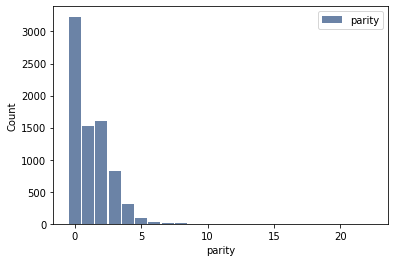

In [107]:
#Now we want to see the number of children by respondant:
#This can be descrived as heavily skewed to the 0-3 range
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(xlabel='parity', ylabel='Count')

In [108]:
#We now go back to finding the larget parity
#Most individuals have 3 kids. This can also be correlated to age to see if it was a generational thing. 
hist.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

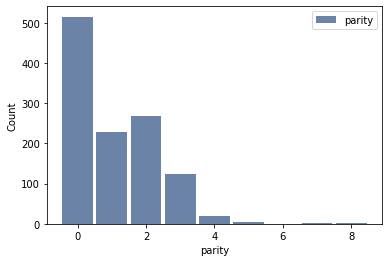

In [109]:
# THe last exercise looks at the data we have to determine how age, income, and parity mix with the data set. It is important to note that studies like these are done over time so it would only be represenative of the data
# Remember our code book of $75K? We anchor to that at 14, and we look at how many kids those repondants have
rich = resp[resp.totincr == 14]
hist = thinkstats2.Hist(rich.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(xlabel='parity', ylabel='Count')

In [110]:
#THis solution finds the largets partity of the highest income. We have the highest at 8 kids. 
#hist.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

In [113]:
#Once again we are lookin at exercises and determinging anyone less than the 14 category is not rich. 
# We then compare the means to find out those that are right have less kids. 

not_rich = resp[resp.totincr < 14]
rich.parity.mean(), not_rich.parity.mean()

(1.0758620689655172, 1.2495758136665125)

In [112]:
#The effect size is negative for our rich parity, meaning those that are rich have less kids and the effect size is negative. 
CohenEffectSize(rich.parity, not_rich.parity)

-0.1251185531466061